In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv("school-21-student-expulsion-prediction/train.csv")

In [3]:
df.head(5)

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,...,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game,contract_status
0,129212391,1990-01-18,Пермь,male,3,7.463235,google_ads,work,5,NaN,...,0.0,0.0,75.0,43.0,100.0,44.0,NaN,9,11,1
1,566688420,1996-07-31,Волгоград,female,1,8.785714,NaN,NaN,0,NaN,...,0.0,0.0,0.0,16.0,22.0,22.0,NaN,7,10,1
2,242300495,1992-06-27,Новосибирск,female,2,6.775000,other,work,0,NaN,...,NaN,NaN,0.0,0.0,16.0,27.0,NaN,7,11,1
3,715424753,1996-06-15,Тула,female,1,8.146104,NaN,NaN,5,0.0,...,0.0,0.0,0.0,0.0,27.0,27.0,NaN,9,6,1
4,382884118,1968-07-18,Голицыно,male,3,4.272727,other,other,0,0.0,...,0.0,0.0,80.0,38.0,0.0,45.0,NaN,7,12,1


In [4]:
to_drop = ['id','Heard about school from','Contract termination date','Native city']

In [5]:
df = df.drop(to_drop, axis=1)

In [6]:
import datetime as dt

In [7]:
now = pd.to_datetime('now')

In [8]:
df['Birth date'] = pd.to_datetime(df['Birth date'], errors='coerce')

In [9]:
df['Birth date'] = (now.year - df['Birth date'].dt.year) - ((now.month - df['Birth date'].dt.month) < 0)

In [10]:
df = df.fillna(0)

In [11]:
df['Gender'].replace({'female':0,'male':1},inplace=True)

In [12]:
df

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,30,1,3,7.463235,work,5,0.0,0.0,80.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,23,0,1,8.785714,0,0,0.0,10.0,45.0,5.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,27,0,2,6.775000,work,0,0.0,20.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,23,0,1,8.146104,0,5,0.0,35.0,25.0,20.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,51,1,3,4.272727,other,0,0.0,0.0,5.0,85.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,24,1,3,4.149733,study,10,0.0,0.0,10.0,20.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,21,1,3,4.320856,study,5,0.0,10.0,0.0,70.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,23,1,2,6.675000,study,30,30.0,10.0,65.0,70.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,28,1,3,6.483333,0,50,0.0,80.0,30.0,47.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


In [13]:
df

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,30,1,3,7.463235,work,5,0.0,0.0,80.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,23,0,1,8.785714,0,0,0.0,10.0,45.0,5.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,27,0,2,6.775000,work,0,0.0,20.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,23,0,1,8.146104,0,5,0.0,35.0,25.0,20.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,51,1,3,4.272727,other,0,0.0,0.0,5.0,85.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,24,1,3,4.149733,study,10,0.0,0.0,10.0,20.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,21,1,3,4.320856,study,5,0.0,10.0,0.0,70.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,23,1,2,6.675000,study,30,30.0,10.0,65.0,70.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,28,1,3,6.483333,0,50,0.0,80.0,30.0,47.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


In [14]:
df['Life status'].replace({'work':1,'study':2,'other':0},inplace=True)

In [15]:
df

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game,contract_status
0,30,1,3,7.463235,1,5,0.0,0.0,80.0,0.0,...,0.0,0.0,0.0,75.0,43.0,100.0,44.0,9,11,1
1,23,0,1,8.785714,0,0,0.0,10.0,45.0,5.0,...,110.0,0.0,0.0,0.0,16.0,22.0,22.0,7,10,1
2,27,0,2,6.775000,1,0,0.0,20.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,11,1
3,23,0,1,8.146104,0,5,0.0,35.0,25.0,20.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,9,6,1
4,51,1,3,4.272727,0,0,0.0,0.0,5.0,85.0,...,120.0,0.0,0.0,80.0,38.0,0.0,45.0,7,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,24,1,3,4.149733,2,10,0.0,0.0,10.0,20.0,...,0.0,0.0,0.0,0.0,0.0,22.0,18.0,7,11,1
1056,21,1,3,4.320856,2,5,0.0,10.0,0.0,70.0,...,120.0,0.0,0.0,20.0,22.0,32.0,27.0,11,12,1
1057,23,1,2,6.675000,2,30,30.0,10.0,65.0,70.0,...,0.0,96.0,0.0,100.0,48.0,80.0,45.0,8,16,1
1058,28,1,3,6.483333,0,50,0.0,80.0,30.0,47.0,...,105.0,0.0,0.0,0.0,64.0,64.0,45.0,8,12,1


In [16]:
df.to_csv('data/after_clean.csv')

In [17]:
corr = df.corr()

In [18]:
corr.to_excel("data/correlation.xlsx")

In [19]:
y = df.contract_status

In [20]:
X = df.drop('contract_status',axis=1)

In [21]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.7, random_state=1)

In [22]:
clf = RandomForestClassifier(random_state=47,n_jobs=-1,n_estimators=200,class_weight='balanced_subsample')

In [23]:
param_destributions = {'max_features': list(range(1,X.shape[1])), "max_depth": list(range(5,30))}

In [24]:
from sklearn import metrics
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Результат на тестовых данных(модель по умолчанию): %f " % (100*metrics.balanced_accuracy_score(y_test,y_pred)))

Результат на тестовых данных(модель по умолчанию): 52.751572 


In [25]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(clf,param_distributions=param_destributions,n_iter=50,cv=5,scoring="balanced_accuracy",n_jobs=-1)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced_subsample',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,

In [26]:
# Сохраняем оптимальную модель и смотрим на ее параметры:
model = random_search.best_estimator_
print("Оптимальные параметры: %s , оценка гиперпараметров: %0.2f " % (random_search.best_params_, random_search.best_score_))
# ограничение параметра max_depth позволяет избежать переобучения, и потому дает лучшие результаты)

Оптимальные параметры: {'max_features': 28, 'max_depth': 5} , оценка гиперпараметров: 0.73 


In [27]:
import pickle
filename = "my_model_RF.sav"
pickle.dump(model,open(filename,'wb'))

In [28]:
model = pickle.load(open(filename, 'rb'))

In [29]:
y_pred = model.predict(X_test)

In [30]:
print("Результат на тестовых данных: %f " %(100*metrics.balanced_accuracy_score(y_test,y_pred)))

Результат на тестовых данных: 65.172956 


Матрица неточностей:
[[ 36  70]
 [ 23 613]]


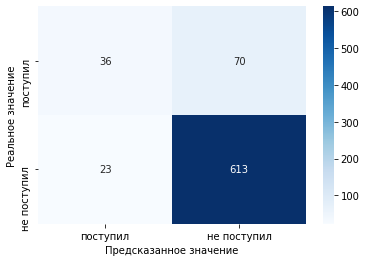

In [31]:

cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
print("Матрица неточностей:")
print(cnf_matrix)

sb.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=["поступил","не поступил"], yticklabels=["поступил","не поступил"])
plt.ylabel('Реальное значение')
plt.xlabel('Предсказанное значение')
plt.show()

In [32]:
test_data = pd.read_csv("school-21-student-expulsion-prediction/test.csv")

In [33]:
test_data.head()

,id,Birth date,Native city,Gender,Wave id,Level,Heard about school from,Life status,day_00,day_01,...,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Contract termination date,Memory entrance game,Logic entrance game
0,685512434,1992-09-08,г. Тюмень,male,3,8.834416,google_ads,work,10,NaN,...,120.0,0.0,0.0,75.0,43.0,64.0,45.0,NaN,10,12
1,157712083,1993-12-02,Москва,male,2,2.172414,from_21_student,work,7,0.0,...,0.0,0.0,NaN,80.0,22.0,33.0,36.0,NaN,7,6
2,672158583,1989-02-16,Москва,male,3,4.310160,from_friends,other,5,0.0,...,0.0,0.0,75.0,0.0,6.0,33.0,9.0,NaN,7,10
3,1205321261,1997-07-16,Дзержинский,female,2,6.295833,other,study,20,0.0,...,100.0,0.0,0.0,15.0,1.0,16.0,22.0,NaN,9,8
4,621191476,1997-02-22,Москва,male,1,7.110294,NaN,NaN,100,100.0,...,0.0,0.0,0.0,65.0,65.0,54.0,36.0,NaN,9,15


In [34]:
id_student = test_data['id']

test_data = test_data.drop(to_drop, axis=1)

In [35]:
test_data

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,1992-09-08,male,3,8.834416,work,10,NaN,80.0,40.0,30.0,...,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,10,12
1,1993-12-02,male,2,2.172414,work,7,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,NaN,80.0,22.0,33.0,36.0,7,6
2,1989-02-16,male,3,4.310160,other,5,0.0,0.0,5.0,10.0,...,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,7,10
3,1997-07-16,female,2,6.295833,study,20,0.0,30.0,0.0,10.0,...,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,9,8
4,1997-02-22,male,1,7.110294,NaN,100,100.0,80.0,30.0,0.0,...,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,1997-03-25,male,3,5.726415,NaN,0,30.0,35.0,40.0,0.0,...,100.0,120.0,0.0,0.0,100.0,54.0,32.0,30.0,8,11
702,1999-01-03,male,4,2.475862,study,40,55.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,27.0,27.0,22.0,7,12
703,1993-08-26,male,1,8.724026,NaN,5,0.0,0.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,7
704,1988-11-02,male,4,6.766667,work,32,NaN,0.0,80.0,5.0,...,0.0,120.0,0.0,0.0,0.0,0.0,48.0,31.0,8,7


In [36]:
test_data['Gender'].replace({'female':0,'male':1},inplace=True)

In [37]:
test_data.head()

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,1992-09-08,1,3,8.834416,work,10,NaN,80.0,40.0,30.0,...,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,10,12
1,1993-12-02,1,2,2.172414,work,7,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,NaN,80.0,22.0,33.0,36.0,7,6
2,1989-02-16,1,3,4.310160,other,5,0.0,0.0,5.0,10.0,...,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,7,10
3,1997-07-16,0,2,6.295833,study,20,0.0,30.0,0.0,10.0,...,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,9,8
4,1997-02-22,1,1,7.110294,NaN,100,100.0,80.0,30.0,0.0,...,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,9,15


In [38]:
now = pd.to_datetime('now')
test_data['Birth date'] = pd.to_datetime(test_data['Birth date'], errors='coerce')
test_data['Birth date'] = (now.year - test_data['Birth date'].dt.year) - ((now.month - test_data['Birth date'].dt.month) < 0)

In [39]:
test_data


,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,27,1,3,8.834416,work,10,NaN,80.0,40.0,30.0,...,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,10,12
1,26,1,2,2.172414,work,7,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,NaN,80.0,22.0,33.0,36.0,7,6
2,31,1,3,4.310160,other,5,0.0,0.0,5.0,10.0,...,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,7,10
3,22,0,2,6.295833,study,20,0.0,30.0,0.0,10.0,...,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,9,8
4,23,1,1,7.110294,NaN,100,100.0,80.0,30.0,0.0,...,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,23,1,3,5.726415,NaN,0,30.0,35.0,40.0,0.0,...,100.0,120.0,0.0,0.0,100.0,54.0,32.0,30.0,8,11
702,21,1,4,2.475862,study,40,55.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,27.0,27.0,22.0,7,12
703,26,1,1,8.724026,NaN,5,0.0,0.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,7
704,31,1,4,6.766667,work,32,NaN,0.0,80.0,5.0,...,0.0,120.0,0.0,0.0,0.0,0.0,48.0,31.0,8,7


In [40]:
for i in np.arange(test_data.shape[1]):
  test_data.iloc[:, i].fillna(0, inplace=True)

In [41]:
test_data['Life status'].replace({'work':1,'study':2,'other':0},inplace=True)

In [42]:
test_data

,Birth date,Gender,Wave id,Level,Life status,day_00,day_01,day_02,day_03,day_04,...,bsq,rush_00,rush_01,rush_02,exam_00,exam_01,exam_02,exam_final,Memory entrance game,Logic entrance game
0,27,1,3,8.834416,1,10,0.0,80.0,40.0,30.0,...,100.0,120.0,0.0,0.0,75.0,43.0,64.0,45.0,10,12
1,26,1,2,2.172414,1,7,0.0,0.0,50.0,0.0,...,0.0,0.0,0.0,0.0,80.0,22.0,33.0,36.0,7,6
2,31,1,3,4.310160,0,5,0.0,0.0,5.0,10.0,...,0.0,0.0,0.0,75.0,0.0,6.0,33.0,9.0,7,10
3,22,0,2,6.295833,2,20,0.0,30.0,0.0,10.0,...,0.0,100.0,0.0,0.0,15.0,1.0,16.0,22.0,9,8
4,23,1,1,7.110294,0,100,100.0,80.0,30.0,0.0,...,100.0,0.0,0.0,0.0,65.0,65.0,54.0,36.0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,23,1,3,5.726415,0,0,30.0,35.0,40.0,0.0,...,100.0,120.0,0.0,0.0,100.0,54.0,32.0,30.0,8,11
702,21,1,4,2.475862,2,40,55.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.0,27.0,22.0,7,12
703,26,1,1,8.724026,0,5,0.0,0.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,16.0,27.0,7,7
704,31,1,4,6.766667,1,32,0.0,0.0,80.0,5.0,...,0.0,120.0,0.0,0.0,0.0,0.0,48.0,31.0,8,7


In [44]:
pred = model.predict(test_data)

In [45]:
ans = pd.DataFrame()

ans['id'] = id_student
ans['contract_status'] = pred

In [46]:
ans['contract_status'] = [int(ans['contract_status'][i]) for i in range(len(ans['contract_status']))]

In [47]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 2 columns):
id                 706 non-null int64
contract_status    706 non-null int64
dtypes: int64(2)
memory usage: 11.2 KB


In [48]:
ans.head()

,id,contract_status
0,685512434,1
1,157712083,0
2,672158583,1
3,1205321261,1
4,621191476,1


In [50]:
from collections import Counter

Counter(ans['contract_status'])

Counter({1: 639, 0: 67})

In [51]:
ans.to_csv('prediction_rf.csv', index=False)